# DataAugmentation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import sys
import random
from PIL import Image
import numpy as np
import tqdm as tqdm

from torchvision import transforms

sys.path.insert(0, "..\\Scripts")

from DataAugmentation import DataAugmentation
from DataAugmentation2 import DataAugmentation2

## Prove

In [2]:
im_path = os.path.join("..\\Dataset\\train_set", "train_043794.jpg")
img = cv2.imread(im_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = Image.fromarray(img)

aug = DataAugmentation()
im_hole = aug.random_cutout(img)
im_sat = aug.random_saturation(img)
im_rot = aug.random_rotation(img)
im_blur = aug.random_gaussian_blur(img)
im_crop = aug.random_resized_crop(img)
im_brightness = aug.random_brightness(img)
im_tot = aug.apply_transformations(img)

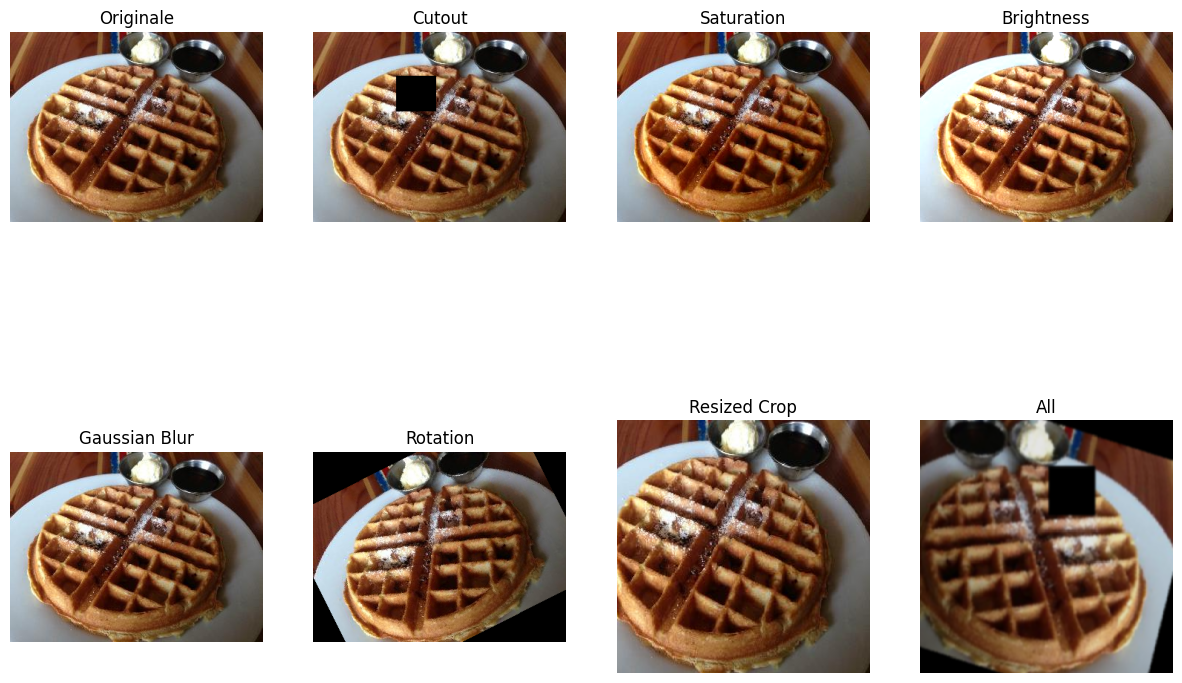

In [3]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0][0].imshow(img)
ax[0][0].set_title("Originale")
ax[0][0].axis("off")

ax[0][1].imshow(im_hole)
ax[0][1].set_title("Cutout")
ax[0][1].axis("off")

ax[0][2].imshow(im_sat)
ax[0][2].set_title("Saturation")
ax[0][2].axis("off")

ax[0][3].imshow(im_brightness)
ax[0][3].set_title("Brightness")
ax[0][3].axis("off")

ax[1][0].imshow(im_blur)
ax[1][0].set_title("Gaussian Blur")
ax[1][0].axis("off")

ax[1][1].imshow(im_rot)
ax[1][1].set_title("Rotation")
ax[1][1].axis("off")

ax[1][2].imshow(im_crop)
ax[1][2].set_title("Resized Crop")
ax[1][2].axis("off")

ax[1][3].imshow(im_tot)
ax[1][3].set_title("All")
ax[1][3].axis("off")

plt.show()

## Create new dataset - Data Augmentation 1

In [2]:
df_small = pd.read_csv('../Dataset/train_small.csv')
df_small.head()

,Image,Label
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


In [5]:
path_augmented_data = os.path.join("..", "Dataset", "train_augmented")

if not os.path.exists(path_augmented_data):
    os.makedirs(path_augmented_data)

In [6]:
path_train = os.path.join("..", "Dataset", "train_set")

In [8]:
skip = True
if not(skip):
    for i, row in df_small.iterrows():
        img_file = row["Image"]
        img_name = img_file.split(".")[0]
        img = cv2.imread(os.path.join(path_train, img_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)

        for j in range(5):
            im_tot = aug.apply_transformations(img)
            im_tot.save(os.path.join(path_augmented_data, f"{img_name}_{j}.jpg"))

In [9]:
df_augmented = pd.DataFrame(columns=["Image", "Label"])
rows = []

for i, row in df_small.iterrows():
    img_file = row["Image"]
    img_name = img_file.split(".")[0]
    for j in range(5):
        rows.append({"Image": f"{img_name}_{j}.jpg", "Label": row["Label"]})

df_augmented = pd.DataFrame(rows)


In [10]:
df_augmented.to_csv(os.path.join("..", "Dataset", "train_augmented.csv"), index=False)

## Data Augmentation 2

In [11]:
def random_rgb_value():
    return tuple(np.random.randint(0, 256, 3))

In [12]:
def add_salt_and_pepper_RGB(img, prob=0.01):
    output = np.zeros(img.shape, np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = random_rgb_value()
            else:
                output[i][j] = img[i][j]
    return output

In [25]:
def add_gaussian_noise(img, mean=0, std=50):
    noise = np.random.normal(mean, std, img.shape)
    output = img + noise
    output = np.clip(output, 0, 255)
    output = np.uint8(output)
    return output

In [ ]:
def add_jpeg_compression(img):
    quality = np.random.randint(50, 100)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, encimg = cv2.imencode(".jpg", img, encode_param)
    decimg = cv2.imdecode(encimg, 1)
    return decimg

In [ ]:
def add_blur(img, kernel_size=5):
    strength = np.random.randint(1, 10)
    for i in range(strength):
        img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [26]:
im_path = os.path.join("..\\Dataset\\train_set", "train_043794.jpg")
img = cv2.imread(im_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = Image.fromarray(img)

im_salt_pepper = add_salt_and_pepper_RGB(np.array(img), prob=0.2)
im_gaussian_noise = add_gaussian_noise(np.array(img))
im_jpeg_compression = add_jpeg_compression(np.array(img), 10)
im_blur = add_blur(np.array(img))

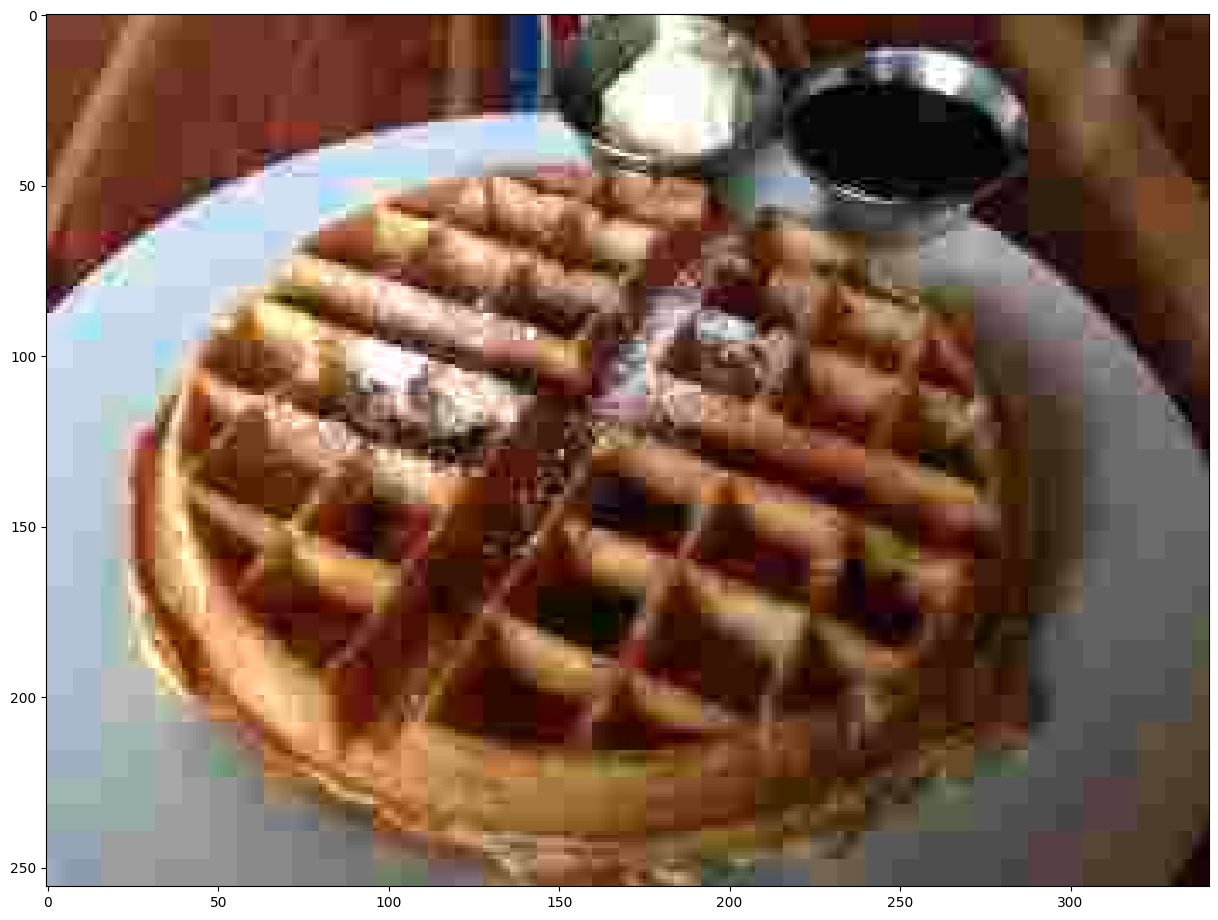

In [17]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(im_jpeg_compression)

(-0.5, 340.5, 255.5, -0.5)

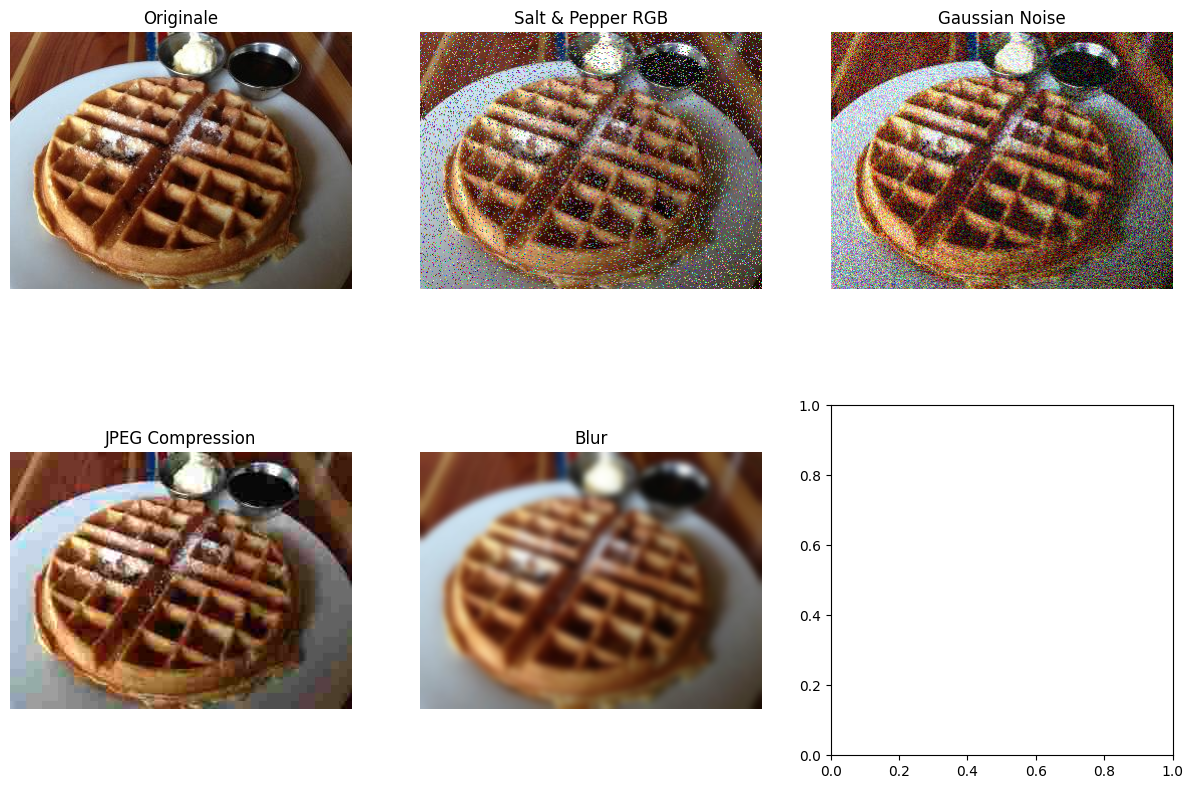

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax = ax.flatten()

ax[0].imshow(img)
ax[0].set_title("Originale")
ax[0].axis("off")

ax[1].imshow(im_salt_pepper)
ax[1].set_title("Salt & Pepper RGB")
ax[1].axis("off")

ax[2].imshow(im_gaussian_noise)
ax[2].set_title("Gaussian Noise")
ax[2].axis("off")

ax[3].imshow(im_jpeg_compression)
ax[3].set_title("JPEG Compression")
ax[3].axis("off")

ax[4].imshow(im_blur)
ax[4].set_title("Blur")
ax[4].axis("off")


In [3]:
aug2 = DataAugmentation2()

In [4]:
path_augmented_data = os.path.join("..", "Dataset", "train_augmented2")

if not os.path.exists(path_augmented_data):
    os.makedirs(path_augmented_data)

In [5]:
path_train = os.path.join("..", "Dataset", "train_set")

In [6]:
for i, row in df_small.iterrows():
        img_file = row["Image"]
        img_name = img_file.split(".")[0]
        img = cv2.imread(os.path.join(path_train, img_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)

        for j in range(5):
            im_tot = aug2.apply_transformations(img)
            im_tot = Image.fromarray(im_tot)
            im_tot.save(os.path.join(path_augmented_data, f"{img_name}_{j}.jpg"))

In [7]:
df_augmented = pd.DataFrame(columns=["Image", "Label"])
rows = []

for i, row in df_small.iterrows():
    img_file = row["Image"]
    img_name = img_file.split(".")[0]
    for j in range(5):
        rows.append({"Image": f"{img_name}_{j}.jpg", "Label": row["Label"]})

df_augmented = pd.DataFrame(rows)

In [8]:
df_augmented.to_csv(os.path.join("..", "Dataset", "train_augmented2.csv"), index=False)

In [9]:
df_augmented =pd.concat([df_small, df_augmented], ignore_index=True)

In [10]:
df_augmented.to_csv(os.path.join("..", "Dataset", "train_augmented2.csv"), index=False)